# Introducción a la estadística (Parte 2)

# Introducción

En la lección anterior conocimimos las medidas estadísticas comúnmente empleadas para determinar variabilidad y relación entre variables.

En esta lección, nos enfocaremos en aquellas que podemos emplear sobre distribuciones y cómo probar hipótesis.

# Cargando nuestros módulos

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats.distributions as dist
import seaborn as sns

# Distribuciones

Una de las mejores maneras de describir una variable es reportar los valores que aparecen en el dataset relacionados con dicha viariable y la cantida de veces que aparece cada uno. A este tipo de descripción la llamamos **distribución** de una variable.

La forma más común de representar a una distribución es mediante un histograma, la cual es una gráfica que muestra la frecuencia de cada valor de la variable.

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

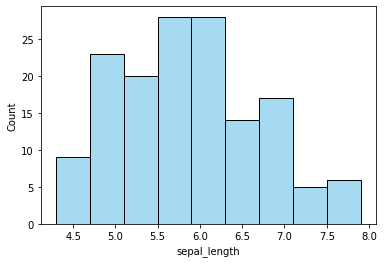

In [3]:
sns.histplot(iris["sepal_length"] , color="skyblue", label="Sepal Length")

También puedes utilizar simplemente un contador para obtener las frecuencias de los valores en un diccionario donde cada clave es un valor de la variable y cada valor es la frecuencia

In [5]:
counter = Counter(iris['sepal_length'])
counter

Counter({5.1: 9,
         4.9: 6,
         4.7: 2,
         4.6: 4,
         5.0: 10,
         5.4: 6,
         4.4: 3,
         4.8: 5,
         4.3: 1,
         5.8: 7,
         5.7: 8,
         5.2: 4,
         5.5: 7,
         4.5: 1,
         5.3: 1,
         7.0: 1,
         6.4: 7,
         6.9: 4,
         6.5: 5,
         6.3: 9,
         6.6: 2,
         5.9: 3,
         6.0: 6,
         6.1: 6,
         5.6: 6,
         6.7: 8,
         6.2: 4,
         6.8: 3,
         7.1: 1,
         7.6: 1,
         7.3: 1,
         7.2: 3,
         7.7: 4,
         7.4: 1,
         7.9: 1})

Si cuentas con pandas instalado, puedes contabilizarlos con el método value_counts()

In [4]:
iris.value_counts('sepal_length')

sepal_length
5.0    10
5.1     9
6.3     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
5.4     6
5.6     6
6.1     6
4.8     5
6.5     5
4.6     4
5.2     4
6.9     4
6.2     4
7.7     4
5.9     3
6.8     3
4.4     3
7.2     3
4.7     2
6.6     2
4.5     1
7.9     1
5.3     1
7.0     1
7.1     1
7.3     1
7.4     1
7.6     1
4.3     1
dtype: int64

In [6]:
pd.value_counts(iris['sepal_length'])

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal_length, dtype: int64

# Métricas sobre distribuciones

## Percentiles

Los percentiles son una forma de obtener el valor que corresponde a un cierto porcentaje de los datos ordenados en una distribución, de tal manera que no importa si la distribución es asimétrica, el percentil nos permite hacer el "corte" en la posición porcentual que requerimos.

La mediana, puede considerarse un "nombre especial" para el percentil 50, esto significa que el valor de la mediante siempre es mayor que el 50% de los datos ordenados.

Lo mismo se puede decir de cualquier otro percentil, es decir, si calculas el percentil 25, eso quiere decir que acabas de encontrar un valor en los datos que es mayor que el 25% de los datos ordenados.

In [5]:
# Vamos a utilizar nuevamente el dataset 'iris'
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [51]:
# Especifica qué percentiles deseas obtener
percentiles = np.array([25, 50, 75])

# Obtenemos los datos para el 
versicolor_petal_length = iris.query('species=="versicolor"').loc[:,'petal_length']

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[4.   4.35 4.6 ]


### Visualizando percentiles mediante histograma

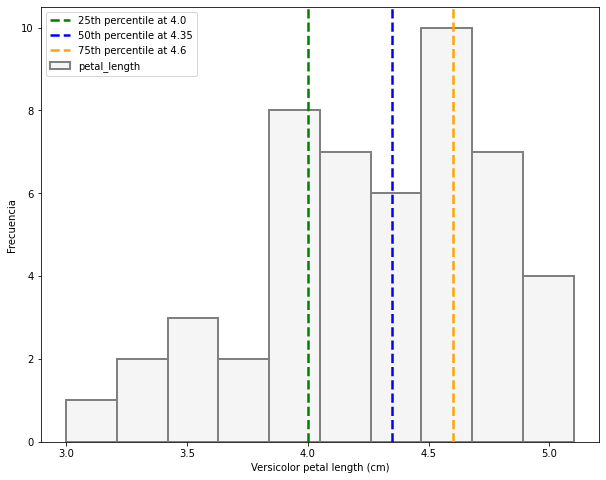

In [53]:
# Plot the ECDF
_ = versicolor_petal_length.plot(kind='hist', figsize=(10, 8), linewidth=2, color='whitesmoke', edgecolor='gray')
_ = plt.xlabel('Versicolor petal length (cm)')
_ = plt.ylabel('Frecuencia')

names = ['25th percentile', '50th percentile', '75th percentile']
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(ptiles_vers, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)

plt.legend()

Vamos a corroborar con un boxplot

<AxesSubplot:ylabel='petal_length'>

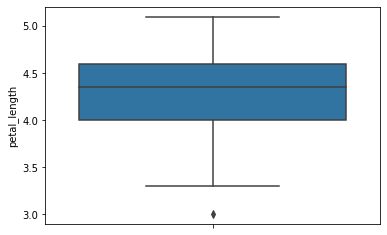

In [55]:
sns.boxplot( y=versicolor_petal_length )

## Outliers (valores atípicos)

Cuando miramos un histograma es muy fácil identificar los valores más comunes en la distribución, pero los outliers no siempre quedan a la vista.

Antes de continuar, siempre es buena idea revisar si tenemos valores atípicos, los cuales son valores extremos que bien pueden ser errores en los registros, o quizá sean reportes precisos de eventos atípicos.

Podemos identificar outliers muy fácilmente con gráficas de caja

La mejor manera de darle manejo a los datos atípicos

### Hallar outliers con boxplots

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

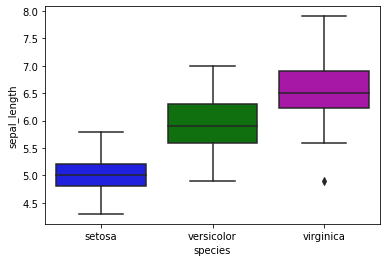

In [57]:
my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
sns.boxplot( x=iris["species"], y=iris["sepal_length"], palette=my_pal)

### Hallar outliers con z-score

In [63]:
data = iris.query('species=="virginica"').loc[:,'sepal_length']
mean = np.mean(data)
std = np.std(data)
print('Media de longitud del sépalo para la especie Virginica: ', mean)
print('Desviación estándar: ', std)

Media de longitud del sépalo para la especie Virginica:  6.587999999999998
Desviación estándar:  0.6294886813914925


In [72]:
threshold = 2.5
outlier = []
for i in data:
    z = (i-mean)/std
    if z > threshold or z < -threshold:
        outlier.append(i)
print('', outlier)

 [4.9]


# Pruebas de hipótesis

## Prueba de hipótesis para una muestra

Esta es la prueba de hipótesis más básica. La mayoría de las veces no tenemos un valor fijo específico para comparar. Pero si es así, esta es la prueba de hipótesis más simple. Voy a comenzar con una prueba de hipótesis de una proporción. Usé el conjunto de datos Heart de Kaggle para esta demostración. No dude en descargar el conjunto de datos para su práctica. Aquí importo los paquetes y el conjunto de datos:

In [6]:
# https://www.kaggle.com/johnsmith88/heart-disease-dataset
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


La última columna del conjunto de datos es "target". Que nos dice si la persona tiene una enfermedad cardíaca.

La pregunta de investigación para esta sección es: “La proporción de la población de Irlanda que padece una enfermedad cardíaca es del 42%. ¿Hay más personas que padecen enfermedades cardíacas en los EE. UU. ”?

Vamos a intentar corroborar esta hipótesis paso por paso:

### Paso 1: Detemrinar la hipótesis nula y las hipótesis alternativas

En este problema, la hipótesis nula es que la proporción de la población que padece una enfermedad cardíaca en los EE. UU. sea menor o igual al 42%. Pero si probamos que sea igual, con eso tendremos para corroborar la hipótesis.

Por lo tanto, podemos definir p0 como:

In [10]:
p0 = 0.42  # Hipótesis nula
# p > 0.42  # Hipótesis alternativa

Veamos si podemos hallar evidencia para refutar la hipótesis nula

### Paso 2: Calcular la proporción de la población que tiene una enfermedad cardiovascular

Asuma que el dataset de más arriba es una muestra representativa de la poblción de Estados Unidos. Entonces, vamos a calcular la proporción de personas que de hecho tienen una enfermedad cardiovascular.

In [13]:
p_us = len(df[df['target']==1])/len(df)
p_us

0.5131707317073171

La proporción de la población de la muestra que tiene enfermedad cardíaca es 0,51 o 51%. Este porcentaje es mayor que la hipótesis nula. Eso es 42%

Pero la pregunta es si es significativamente más del 42%. Si tomamos una muestra aleatoria simple diferente, la proporción de población observada actualmente (51%) puede ser diferente.

Para averiguar si la proporción de población observada es significativamente mayor que la hipótesis nula, realice una prueba de hipótesis.

### Paso 3: Calculando el test estadístico

Esta es la fórmula para el test estadístico

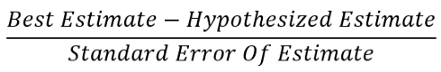

Utilizaremos esta fórmula para el error estándar

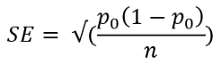

En esta fórmula, `p0` es 0,42 (según la hipótesis nula) y `n` es el tamaño de la población de la muestra. Ahora calcule el error estándar y las estadísticas de la prueba:

In [14]:
se = np.sqrt(0.42 * (1-0.42) / len(df))

Encuentre las estadísticas de prueba utilizando la fórmula para la estadística de prueba anterior:

In [17]:
#Best estimate
be = p_us  #hypothesized estimate
he = 0.42
test_stat = (be - he)/se
test_stat

6.04369858636477

### Paso 4: Calcule el valor p

Esta estadística de prueba también se llama puntuación z. Puede encontrar el valor p de una z_table o puede encontrar el valor p de esta fórmula en Python.

In [18]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
pvalue

1.5062078087269162e-09

The p-value is 0.1718. It means the sample population proportion (46% or 0.46) is 0.1718 null standard errors above the null hypothesis.

### Paso 5: inferir la conclusión del valor p

Considere que el nivel de significancia alfa es 5% o 0.05. Un nivel de significancia del 5% o menos significa que existe una probabilidad del 95% o más de que los resultados no sean aleatorios.

Aquí el valor p es mayor que nuestro nivel de significancia considerado 0.05. Entonces, no podemos rechazar la hipótesis nula. Eso significa que no hay una diferencia significativa en la proporción de la población que padece una enfermedad cardíaca en Irlanda y los EE. UU.

## Pruebas de hipótesis para dos diferentes muestras

Las pruebas comparativas se realizan con mucha más frecuencia que una prueba de hipótesis de una sola muestra de la población.

Se realiza una prueba de proporciones de dos muestras para evaluar si la proporción poblacional de algunos rasgos difiere entre dos subgrupos.

### Paso 1: Determinar la hipótesis nula, la hipótesis alternativa y el nivel significativo (alfa)